In [2]:
from keras import regularizers
from keras.models import Model
from keras.layers import Input,Dense, Flatten, Conv2D, MaxPooling2D, Add, concatenate, BatchNormalization
from keras.utils import to_categorical, plot_model
from keras import optimizers

import matplotlib.pyplot as plt

Using TensorFlow backend.


# Load Data

In [3]:
from keras.datasets import fashion_mnist

(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 1s 0us/step


In [4]:
from keras.utils import to_categorical

# add 1 at the end to denote greyscale
x_train.shape += (1,) 
x_test.shape += (1,)

# normalize
x_train = x_train/255
x_test = x_test/255

# get data parameters
inputShape =  x_train.shape[1:]
classCount = len(set(y_test))

# onehot encode truth values 
y_test = to_categorical(y_test, classCount)
y_train = to_categorical(y_train, classCount)

# CNN with ResNet Connections and Inception Blocks

In [6]:
from keras.models import Model
from keras.layers import Input,Dense, Flatten, Conv2D, MaxPooling2D, Add, concatenate, BatchNormalization

# define input layer
inputLayer = Input(shape=inputShape)

# conv block 1
network = Conv2D(filters=64,kernel_size=(5, 5),activation='relu')(inputLayer)
network = BatchNormalization()(network)
network = MaxPooling2D(pool_size=(3, 3), strides=(2, 2))(network)

# skip connection 1
skip_con = network # save inputs for skip connection 
network = Conv2D(filters=64, kernel_size=(3, 3),activation='relu', padding='same')(network)
network = BatchNormalization()(network)
nework = Add()([network,skip_con])# add inputs for skip connection

# conv block 2
network = Conv2D(64, kernel_size=(3, 3),activation='relu')(network)
network = Conv2D(128, kernel_size=(3, 3),activation='relu')(network)
network = BatchNormalization()(network)
network = MaxPooling2D(pool_size=(2, 2))(network)

# skip connection 2
skip_con = network # save inputs for skip connection 
network = Conv2D(128, kernel_size=(3, 3),activation='relu', padding='same')(network)
network = BatchNormalization()(network)
nework = Add()([network,skip_con])# add inputs for skip connection

# inception module
conv_triXtri = Conv2D(128, (1,1), padding='same', activation='relu')(network)
conv_triXtri = Conv2D(128, (3,3), padding='same', activation='relu')(conv_triXtri)
conv_fiveXfive = Conv2D(128, (1,1), padding='same', activation='relu')(network)
conv_fiveXfive = Conv2D(128, (5,5), padding='same', activation='relu')(conv_fiveXfive)
pooling = MaxPooling2D((3,3), strides=(1,1), padding='same')(network)
pooling = Conv2D(128, (1,1), padding='same', activation='relu')(pooling)
conv_oneXone = Conv2D(128, (1,1), padding='same', activation='relu')(network)

# combining components of inception module
inception_mod = concatenate([conv_oneXone, conv_triXtri, conv_fiveXfive, pooling], axis = 3)
network = BatchNormalization()(inception_mod)

# fully connected layer
network = Conv2D(128, kernel_size=(2, 2), activation='relu')(network)
network = BatchNormalization()(network)
network = MaxPooling2D(pool_size=(2, 2))(network)

# flatten before fully connected layer
network = Flatten()(network)

# create and connect dense/output layers
network = Dense(120, activation='relu')(network)
outputLayer = Dense(10, activation='softmax')(network)

model = Model(inputs=inputLayer, outputs=outputLayer)
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [7]:
history = model.fit(x_train, y_train, validation_split=0.1, epochs=10, verbose=False)

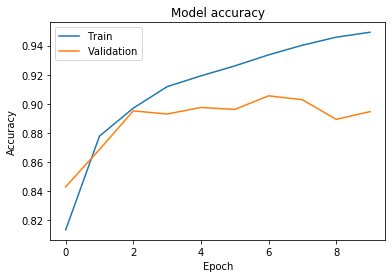

In [8]:
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [9]:
loss, acc = model.evaluate(x_test,y_test)
print(f"Test ACC: {acc}")
print(f"Test Error: {loss}")

10000/10000 [==============================] - 11s 1ms/step
Test ACC: 0.8853999972343445
Test Error: 0.33188413553237917


In [ ]:
# Simple CNN with dropout

In [29]:
from keras.models import Model
from keras.layers import Input,Dense, Flatten, Conv2D, MaxPooling2D, BatchNormalization, Dropout

inputLayer = Input(shape=inputShape, name='in')

# block 1
network = Conv2D(filters=64,kernel_size=(5, 5),activation='relu', name='block1_conv64')(network)
network = BatchNormalization(name='block1_batchNorm')(network)
network = MaxPooling2D(pool_size=(3, 3), strides=(2, 2), name='block1_maxPool')(network)

# block 2
network = Dropout(rate=0.2, name='block2_dropout1')(network)
network = Conv2D(64, kernel_size=(3, 3),activation='relu', name='block2_conv64')(network)
network = Dropout(rate=0.2, name='block2_dropout2')(network)
network = Conv2D(128, kernel_size=(3, 3),activation='relu', name='block2_conv128')(network)
network = BatchNormalization(name='block2_batchNorm')(network)
network = MaxPooling2D(pool_size=(2, 2), name='block2_maxPool')(network)

# fully connected layers
network = Flatten(name='flatten')(network)
network = Dense(256, activation='relu', name='fullyconnected_256')(network)
network = Dense(128, activation='relu', name='fullyconnected_128')(network)

outputLayer = Dense(10, activation='softmax', name='out')(network)

model = Model(inputs=inputLayer, outputs=outputLayer)
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [30]:
history = model.fit(x_train, y_train, validation_split=0.1, epochs=10, verbose=False)

Train on 54000 samples, validate on 6000 samples
Epoch 1/12
54000/54000 [==============================] - 22s 416us/step - loss: 8.7322 - accuracy: 0.7436 - val_loss: 3.5343 - val_accuracy: 0.7410
Epoch 2/12
54000/54000 [==============================] - 14s 254us/step - loss: 2.0790 - accuracy: 0.7917 - val_loss: 1.3693 - val_accuracy: 0.7997
Epoch 3/12
54000/54000 [==============================] - 15s 270us/step - loss: 1.1949 - accuracy: 0.7980 - val_loss: 1.1240 - val_accuracy: 0.7862
Epoch 4/12
54000/54000 [==============================] - 15s 280us/step - loss: 1.0663 - accuracy: 0.8024 - val_loss: 1.0219 - val_accuracy: 0.8060
Epoch 5/12
54000/54000 [==============================] - 16s 304us/step - loss: 1.0426 - accuracy: 0.8038 - val_loss: 1.0340 - val_accuracy: 0.8022
Epoch 6/12
54000/54000 [==============================] - 16s 301us/step - loss: 1.0338 - accuracy: 0.8052 - val_loss: 1.1943 - val_accuracy: 0.7432
Epoch 7/12
54000/54000 [==============================] -

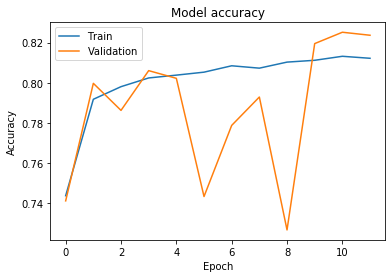

In [31]:
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [32]:
loss, acc = model.evaluate(x_test,y_test)
print(f"Test ACC: {acc}")
print(f"Test Error: {loss}")

10000/10000 [==============================] - 1s 91us/step
Test ACC: 0.8159999847412109
Test Error: 0.9963034808158875


# Test without Skip-connections or Inception module

In [8]:
from keras import regularizers
from keras.models import Model
from keras.layers import Input,Dense, Flatten, Conv2D, MaxPooling2D, Add, concatenate, BatchNormalization
from keras.utils import to_categorical, plot_model
from keras import optimizers

import matplotlib.pyplot as plt

In [9]:
from keras.datasets import fashion_mnist

(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

In [10]:
#
# Preprocess data
#

classCount = len(set(y_test))
inputShape = [x_train.shape[1], x_train.shape[2], 1]

# add 1d at the end to signify greyscale
x_train = x_train/255
x_test = x_test/255
x_train = x_train.reshape(x_train.shape[0], inputShape[0], inputShape[1], 1)
x_test = x_test.reshape(x_test.shape[0], inputShape[0], inputShape[1], 1)

# 'onehot' encode truth values 
y_test = to_categorical(y_test, classCount)
y_train = to_categorical(y_train, classCount)

In [11]:
# define input layer
inputLayer = Input(shape=inputShape)

# conv block 1
network = Conv2D(filters=64,kernel_size=(5, 5),activation='relu')(inputLayer)
network = BatchNormalization()(network)
network = MaxPooling2D(pool_size=(3, 3), strides=(2, 2))(network)

# conv block 2
network = Conv2D(64, kernel_size=(3, 3),activation='relu')(network)
network = Conv2D(128, kernel_size=(3, 3),activation='relu')(network)
network = BatchNormalization()(network)
network = MaxPooling2D(pool_size=(2, 2))(network)

# fully connected layer
network = Conv2D(128, kernel_size=(2, 2), activation='relu')(network)
network = BatchNormalization()(network)
network = MaxPooling2D(pool_size=(2, 2))(network)

# flatten before fully connected layer
network = Flatten()(network)

# create and connect dense/output layers
network = Dense(120, activation='relu')(network)
outputLayer = Dense(10, activation='softmax')(network)

model = Model(inputs=inputLayer, outputs=outputLayer)
model.compile(optimizer='sgd',loss='categorical_crossentropy',metrics=['accuracy'])

In [12]:
history = model.fit(x_train, y_train, validation_split=0.1, epochs=10)

Train on 54000 samples, validate on 6000 samples
Epoch 1/10
54000/54000 [==============================] - 104s 2ms/step - loss: 0.5242 - accuracy: 0.8102 - val_loss: 0.4240 - val_accuracy: 0.8442
Epoch 2/10
54000/54000 [==============================] - 102s 2ms/step - loss: 0.3701 - accuracy: 0.8656 - val_loss: 0.3715 - val_accuracy: 0.8662
Epoch 3/10
54000/54000 [==============================] - 102s 2ms/step - loss: 0.3207 - accuracy: 0.8824 - val_loss: 0.3641 - val_accuracy: 0.8657
Epoch 4/10
54000/54000 [==============================] - 102s 2ms/step - loss: 0.2911 - accuracy: 0.8947 - val_loss: 0.3459 - val_accuracy: 0.8708
Epoch 5/10
54000/54000 [==============================] - 102s 2ms/step - loss: 0.2666 - accuracy: 0.9021 - val_loss: 0.3328 - val_accuracy: 0.8765
Epoch 6/10
54000/54000 [==============================] - 102s 2ms/step - loss: 0.2473 - accuracy: 0.9093 - val_loss: 0.3081 - val_accuracy: 0.8888
Epoch 7/10
54000/54000 [==============================] - 102s 

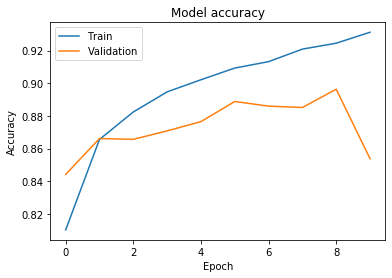

In [14]:
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [13]:
loss, acc = model.evaluate(x_test,y_test)
print(f"Test ACC: {acc}")
print(f"Test Error: {loss}")

10000/10000 [==============================] - 5s 539us/step
Test ACC: 0.8496000170707703
Test Error: 0.4944210599064827
